In [1]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
# read master data
df = pd.read_csv('data/ufc-master.csv')

In [3]:
# view all columns
pd.set_option('display.max_columns', None)
df.sample(5)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
2054,Beneil Dariush,Michael Chiesa,-165,145,60.606061,145.000000,4/16/2016,"Tampa, Florida, USA",USA,Blue,False,Lightweight,MALE,3,0,2,0,20.750000,0.398750,0.750000,1.750000,0.441250,2,2,17,1,0,0,2,0,4,0,6,Southpaw,185.42,190.50,170,0,5,0,29.285714,0.45000,0.714286,1.142857,0.38,5,1,15,0,0,1,2,0,3,0,6,Southpaw,177.80,182.88,155,26,28,0,-3,-3,0,-1,2,1,0,1,7.62,7.62,-2,-8.535714,0.035714,0.607143,0,1,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,1:20,380.0,0.0,0.0,27.0,11.0,53.0,52.0,0.50,0.21,27.0,12.0,53.0,53.0,1.0,1.0,4.0,2.0,0.25,0.50,0.0,2.0,0.0,1.0,0.0,0.0
1395,Daichi Abe,Hyun Gyu Lim,100,-120,100.000000,83.333333,9/22/2017,"Saitama, Saitama, Japan",Japan,Red,False,Welterweight,MALE,3,2,0,0,40.500000,0.446667,0.166667,0.166667,0.166667,2,3,12,0,0,0,0,3,0,0,3,Orthodox,190.50,195.58,170,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Orthodox,180.34,180.34,170,25,32,-2,0,2,3,-3,12,0,3,0,10.16,15.24,-7,40.500000,0.166667,0.166667,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,1.0,0.0,63.0,43.0,183.0,133.0,0.34,0.32,65.0,43.0,185.0,133.0,1.0,0.0,1.0,0.0,1.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0
3828,Daniel Pineda,Pat Schilling,-140,130,71.428571,130.000000,1/20/2012,"Nashville, Tennessee, USA",USA,Red,False,Featherweight,MALE,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,145,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Orthodox,170.18,175.26,145,26,23,0,0,0,0,0,0,0,0,0,2.54,0.00,3,0.000000,0.000000,0.000000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# full info
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 137 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4345 non-null   object 
 1   B_fighter                     4345 non-null   object 
 2   R_odds                        4345 non-null   int64  
 3   B_odds                        4345 non-null   int64  
 4   R_ev                          4345 non-null   float64
 5   B_ev                          4345 non-null   float64
 6   date                          4345 non-null   object 
 7   location                      4345 non-null   object 
 8   country                       4345 non-null   object 
 9   Winner                        4345 non-null   object 
 10  title_bout                    4345 non-null   bool   
 11  weight_class                  4345 non-null   object 
 12  gender                        4345 non-null   object 
 13  no

In [5]:
df.shape

(4345, 137)

### Columns:
- R_fighter, B_fighter: Fighter names
- R_odds, B_odds: The American odds that the fighter will win. Usually scraped from bestfightodds.com
- R_ev, B_ev: The profit on a 100 credit winning bet
- date: The date of the fight
- location: The location of the fight
- country: The country the fight occurs in
- Winner: The winner of the fight [Red, Blue, or Draw]
- title_bout: Was this a title bout?
- weight_class: The weight class of the bout
- gender: Gender of the combatants
- no_of_rounds: The number of rounds in the fight
- B_current_lose_streak, R_current_lose_streak: Current losing streak
- B_current_win_streak, R_current_win_streak: Current winning streak
- B_draw, R_draw: Number of draws
- B_avg_SIG_STR_landed, R_avg_SIG_STR_landed : Significant Strikes Landed per minute
- B_avg_SIG_STR_pct, R_avg_SIG_STR_pct: Significant Striking Accuracy
- B_avg_SUB_ATT, R_avg_SUB_ATT: Average Submissions Attempted per 15 Minutes
- B_avg_TD_landed, R_avg_TD_landed: Average takedowns landed per 15 minutes
- B_avg_TD_pct, R_avg_TD_pct: Takedown accuracy
- B_longest_win_streak, R_longest_win_streak: Longest winning streak
- B_losses, R_losses: Total number of losses
- B_total_rounds_fought, R_total_rounds_fought: Total rounds fought
- B_total_title_bouts, R_total_title_bouts: Total number of title bouts
- B_win_by_Decision_Majority, R_win_by_Decision_Majority: Wins by Majority Decision
- B_win_by_Decision_Split, R_win_by_Decision_Split: Wins by Split Decision
- B_win_by_Decision_Unanimous, R_win_by_Decision_Unanimous: Wins by Unanimous Decision
- B_win_by_KO/TKO, R_win_by_KO/TKO: Wins by KO/TKO
- B_win_by_Submission, R_win_by_Submission: Wins by Submission
- B_win_by_TKO_Doctor_Stoppage, R_win_by_TKO_Doctor_Stoppage: Wins by Doctor Stoppage
- B_wins, R_wins: Total career wins
- B_Stance, R_stance: Fighter stance
- B_Height_cms, R_Height_cms: Fighter height in cms
- B_Reach_cms, R_Reach_cms: Fighter reach in cms
- B_Weight_lbs, R_Weight_lbs: Fighter weight in pounds
- B_age, R_age: Fighter age
- lose_streak_dif: (Blue lose streak) - (Red lose streak) winstreakdif: (Blue win streak) - (Red win streak)
- longest_win_streak_dif: (Blue longest win streak) - (Red longest win streak)
- win_dif: (Blue wins) - (Red wins)
- loss_dif: (Blue losses) - (Red losses)
- total_round_dif: (Blue total rounds fought) - (Red total rounds fought)
- total_title_bout_dif: (Blue number of title fights) - (Red number of title fights)
- ko_dif: (Blue wins by KO/TKO) - (Red wins by KO/TKO)
- sub_dif: (Blue wins by submission) - (Red wins by submission)
- height_dif: (Blue height) - (Red height) in cms
- reach_dif: (Blue reach) - (Red reach) in cms
- age_dif: (Blue age) - (Red age)
- sig_str_dif: (Blue sig strikes per minute) - (Red sig strikes per minute)
- avg_sub_att_dif: (Blue submission attempts) - (Red submission attempts)
- avg_td_dif: (Blue TD attempts) - (Red TD attempts)
- empty_arena: Did this fight occur in an empty arena? (1,0)
- constant_1: The number 1
- B_match_weightclass_rank, R_match_weightclass_rank: Rank in the weightclass this bout takes place in
- R_Women's Flyweight_rank, B_Women's Flyweight_rank: Rank in the Women's Flyweight Division
- B_Women's Featherweight_rank, 'RWomen's Featherweightrank: Rank in the Women's Featherweight Division BWomen's 
- Strawweightrank, 'R_Women's Strawweight_rank: Rank in the Women's Strawweight Division
- B_Women's Bantamweight_rank, R_Women's Bantamweight_rank: Rank in the Women's Bantamweight Division
- B_Heavyweight_rank, R_Heavyweight_rank: Heavyweight rank
- B_Light Heavyweight_rank, R_Light Heavyweight rank: Light Heavyweight rank
- B_Middleweight_rank, R_Middleweight_rank: Middleweight rank
- B_Welterweight_rank, R_Welterweight_rank: Welterweight rank
- B_Lightweight_rank, R_Lightweight_rank: Lightweight rank
- B_Featherweight_rank, R_Featherweight_rank: Featherweight rank
- B_Bantamweight_rank, R_Bantamweight_rank: Bantamweight rank
- B_Flyweight_rank, R_Flyweight_rank: Flyweight rank
- B_Pound-for-Pound_rank, R_Pound-for-Pound_rank: Pound-for-Pound rank
- better_rank: Who has the better rank (Red, Blue, neither)
- finish: How the fight finished
- finish_details: More details about the finish if available.
- finish_round: The round the fight ended
- finish_round_time: Time in the round of the finish
- total_fight_time_secs: Total time of the fight in seconds

As observed, the dataset has many columns in which many might be collinear or unuseful in other ways. We should now check for null values and take care of them first. First, we can start by checking for duplicates and discarding them.

In [6]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicates, so we can move on to the null values.

In [7]:
# set max rows to show all rows
pd.set_option('display.max_rows', 500)

# check total missing values
df.isna().sum()

R_fighter                          0
B_fighter                          0
R_odds                             0
B_odds                             0
R_ev                               0
B_ev                               0
date                               0
location                           0
country                            0
Winner                             0
title_bout                         0
weight_class                       0
gender                             0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_SIG_STR_landed             930
B_avg_SIG_STR_pct                765
B_avg_SUB_ATT                    832
B_avg_TD_landed                  833
B_avg_TD_pct                     842
B_longest_win_streak               0
B_losses                           0
B_total_rounds_fought              0
B_total_title_bouts                0
B_win_by_Decision_Majority         0
B

In [8]:
# check percentage of missing values in each column
(df.isna().sum()/ df.shape[0]) *100

R_fighter                         0.000000
B_fighter                         0.000000
R_odds                            0.000000
B_odds                            0.000000
R_ev                              0.000000
B_ev                              0.000000
date                              0.000000
location                          0.000000
country                           0.000000
Winner                            0.000000
title_bout                        0.000000
weight_class                      0.000000
gender                            0.000000
no_of_rounds                      0.000000
B_current_lose_streak             0.000000
B_current_win_streak              0.000000
B_draw                            0.000000
B_avg_SIG_STR_landed             21.403913
B_avg_SIG_STR_pct                17.606444
B_avg_SUB_ATT                    19.148446
B_avg_TD_landed                  19.171461
B_avg_TD_pct                     19.378596
B_longest_win_streak              0.000000
B_losses   

We can see that some columns such as `avg_SIG_STR_landed`, `avg_SIG_STR_pct`, `avg_SUB_ATT`, `avg_TD_landed`, `avg_TD_pct`, `finish`, `finish_round`, `finish_round_time` and `total_fight_time_secs` have reasonable null percentages, should be preferrably imputed. Other columns such as `Women's Flyweight_rank` for both red and blue sides have more than 95% of their values missing. For these columns removing them from our dataset would probably be the best choice to avoid bias. Also, it is also impossible to have a value for all rows in these columns. For example, it would be meaningless to have a value for the `Women's Flyweight_rank` in men's matches.

C:\Users\Aref\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Aref\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


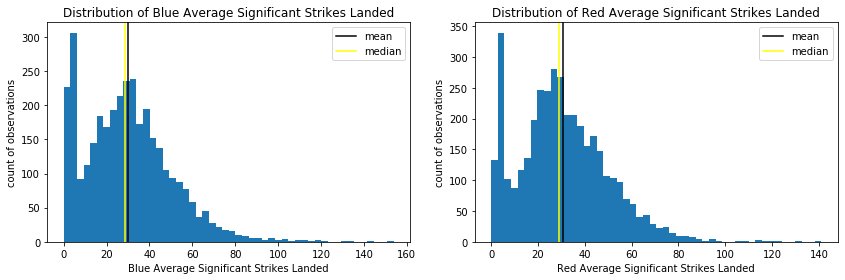

In [9]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_SIG_STR_landed'], bins = 50)
plt.axvline(df['B_avg_SIG_STR_landed'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_SIG_STR_landed'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Significant Strikes Landed')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Blue Average Significant Strikes Landed')

plt.subplot(1,2,2)
plt.hist(df['R_avg_SIG_STR_landed'], bins = 50)
plt.axvline(df['R_avg_SIG_STR_landed'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_SIG_STR_landed'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Significant Strikes Landed')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Significant Strikes Landed')

plt.tight_layout()
plt.show()

We can see that the average and median are almost the same, which makes sense, because the red and blue corners do not mean anything and are chosen at random, so the fighter's ability is irrelevant to the corner they are in. It can also be seen that there seems to be 2 different distributions here, one normal looking distribution, and another peak in the beginning. The normal one is for fights that have gone to distance, which is most fights. The peak in the beginning are most likely earlty knockouts or submissions in the first round. The others are normal fights with 3 to 5 rounds. 

Let's test this hypothesis before making any decisions.

In [10]:
# getting the mean finish round for fights with low significant strikes landed
df[['finish_round']].loc[df['B_avg_SIG_STR_landed'] < 10].squeeze().mean()

2.413005272407733

It seems that our assumption was wrong, which makes sense since this is an average per minute value and not the total in the fight. A good reason for the initial peak could be a fighter's fighting style. Many grapplers do not make many significant strikes. 

Text(0, 0.5, 'Mean Takedowns Landed')

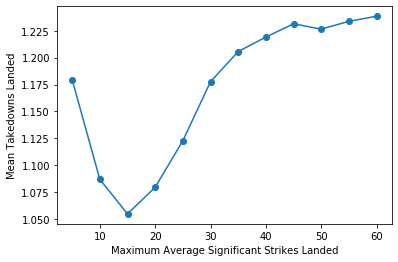

In [11]:
# getting the mean take-down landed for fights with low significant strikes landed
mean_td = []
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    x= df[['B_avg_TD_landed']].loc[df['B_avg_SIG_STR_landed'] < i].squeeze().mean()
    mean_td.append(x)

plt.plot([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], mean_td ,marker = 'o')
plt.xlabel('Maximum Average Significant Strikes Landed')
plt.ylabel('Mean Takedowns Landed')

This result does not really help us make a wiser decision either.Perhaps we will later make more sense of this separate peak in the beginning through unsupervised learning. In this case it would be a good idea to replace NaNs with the average, since most values are not missing and mean seems to be at the highest point of the main curve.

In [12]:
# set NaNs to mean
df['B_avg_SIG_STR_landed'].fillna(df['B_avg_SIG_STR_landed'].mean(), inplace = True)

#check
df['B_avg_SIG_STR_landed']

0        3.600000
1        4.300000
2        3.630000
3        2.870000
4        6.200000
          ...    
4340    29.938082
4341    29.938082
4342     8.000000
4343    29.938082
4344    31.666667
Name: B_avg_SIG_STR_landed, Length: 4345, dtype: float64

In [13]:
# set NaNs to mean
df['R_avg_SIG_STR_landed'].fillna(df['R_avg_SIG_STR_landed'].mean(), inplace = True)

#check
df['R_avg_SIG_STR_landed']

0        5.290000
1        2.390000
2        3.840000
3        8.600000
4        6.550000
          ...    
4340    13.666667
4341    18.000000
4342    12.000000
4343    40.500000
4344    15.666667
Name: R_avg_SIG_STR_landed, Length: 4345, dtype: float64

C:\Users\Aref\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Aref\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


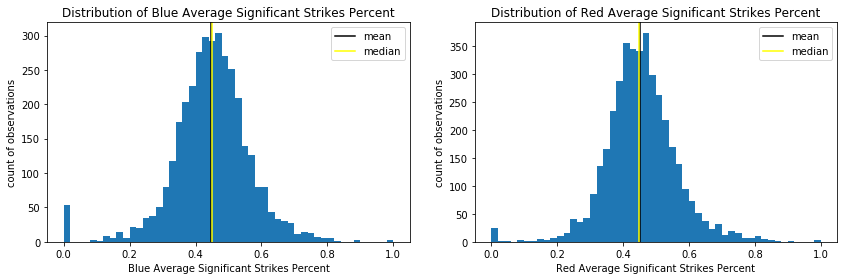

In [14]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_SIG_STR_pct'], bins = 50)
plt.axvline(df['B_avg_SIG_STR_pct'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_SIG_STR_pct'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Significant Strikes Percent')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Blue Average Significant Strikes Percent')

plt.subplot(1,2,2)
plt.hist(df['R_avg_SIG_STR_pct'], bins = 50)
plt.axvline(df['R_avg_SIG_STR_pct'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_SIG_STR_pct'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Significant Strikes Percent')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Significant Strikes Percent')

plt.tight_layout()
plt.show()

This histogram is basically what every data scientist dreams of when they have got a new data set! The distribution is very normal and here we can confidently replace our Nulls with the mean or the median. Lets choose the median this time.

In [15]:
# set NaNs to median
df['R_avg_SIG_STR_pct'].fillna(df['R_avg_SIG_STR_pct'].median(), inplace = True)

#check
df['R_avg_SIG_STR_pct']

0       0.420000
1       0.390000
2       0.510000
3       0.480000
4       0.640000
          ...   
4340    0.576667
4341    0.550000
4342    0.250000
4343    0.405000
4344    0.588333
Name: R_avg_SIG_STR_pct, Length: 4345, dtype: float64

In [16]:
# set NaNs to median
df['B_avg_SIG_STR_pct'].fillna(df['B_avg_SIG_STR_pct'].median(), inplace = True)

#check
df['B_avg_SIG_STR_pct']

0       0.40
1       0.52
2       0.34
3       0.36
4       0.45
        ... 
4340    0.45
4341    0.45
4342    0.34
4343    0.45
4344    0.46
Name: B_avg_SIG_STR_pct, Length: 4345, dtype: float64

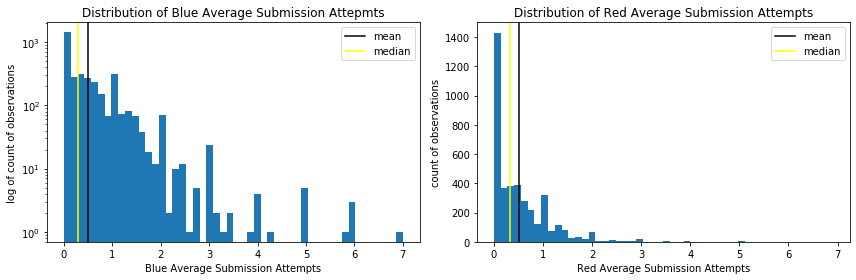

In [17]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_SUB_ATT'], bins = 50)
plt.axvline(df['B_avg_SUB_ATT'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_SUB_ATT'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Submission Attempts')
plt.yscale('log')
plt.ylabel('log of count of observations')
plt.legend()
plt.title('Distribution of Blue Average Submission Attepmts')

plt.subplot(1,2,2)
plt.hist(df['R_avg_SUB_ATT'], bins = 50)
plt.axvline(df['R_avg_SUB_ATT'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_SUB_ATT'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Submission Attempts')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Submission Attempts')

plt.tight_layout()
plt.show()

In [18]:
# check how much of the total values are 0
df['B_avg_SUB_ATT'].loc[df['B_avg_SUB_ATT'] == 0].count() / df['B_avg_SUB_ATT'].count()

0.3808710503842869

For this feature, nearly 40% of the total values are 0, meaning that most fighters did not attempt any submissions within the fight. The best choices to fill the value would either be 0 or the median which is closer to 0 than the mean. Lets also check takedowns landed to see if there are any similar patterns.

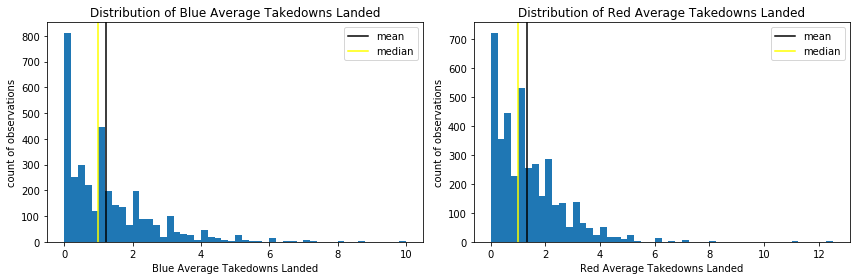

In [19]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_TD_landed'], bins = 50)
plt.axvline(df['B_avg_TD_landed'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_TD_landed'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Takedowns Landed')
#plt.yscale('log')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Blue Average Takedowns Landed')

plt.subplot(1,2,2)
plt.hist(df['R_avg_TD_landed'], bins = 50)
plt.axvline(df['R_avg_TD_landed'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_TD_landed'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Takedowns Landed')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Takedowns Landed')

plt.tight_layout()
plt.show()

In [20]:
# check how much of the total values are 0
df['B_avg_TD_landed'].loc[df['B_avg_TD_landed'] == 0].count() / df['B_avg_TD_landed'].count()

0.21212984054669703

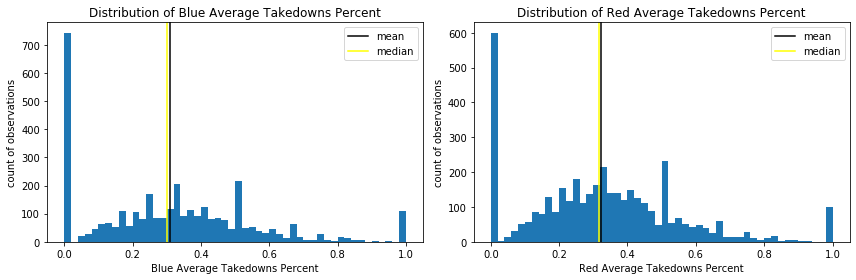

In [21]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_TD_pct'], bins = 50)
plt.axvline(df['B_avg_TD_pct'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_TD_pct'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Takedowns Percent')
#plt.yscale('log')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Blue Average Takedowns Percent')

plt.subplot(1,2,2)
plt.hist(df['R_avg_TD_pct'], bins = 50)
plt.axvline(df['R_avg_TD_pct'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_TD_pct'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Takedowns Percent')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Takedowns Percent')

plt.tight_layout()
plt.show()

In [22]:
# check how much of the total values are 0
df['B_avg_TD_pct'].loc[df['B_avg_TD_pct'] == 0].count() / df['B_avg_TD_pct'].count()

0.21210391093348557

As predicted, 0 takedowns are very common too especially with strikers. However, submissions are more rare. Luckily we have a column `win_by_Submission` for both red and blue corners. We can replace NaN's for all three features with 0 unless their `win_by_Submission` is more than or equal to 1, in which case we will use the mean to fill the values. This is because there are not a lot of fighters with submission wins overall, so if a fighter does have a win by submission in their record we will asume that they are a decent grappler and occasionally attempt takedowns and submissions. Unfortunately this is the best guess we can make. We are assuming fighter with no submission wins would rather fight on their feet than attempt takedowns or submissions.

In [23]:
# conditionally set NaNs to median
df['B_avg_SUB_ATT'] = df.apply(
    lambda row: df['B_avg_SUB_ATT'].median() if (np.isnan(row['B_avg_SUB_ATT'])) & (row['B_win_by_Submission'] >= 1) else row['B_avg_SUB_ATT'],
    axis = 1
)

#set remaining NaNs to 0
df['B_avg_SUB_ATT'].fillna(0, inplace = True)

#check
df['B_avg_SUB_ATT']

0       0.300000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
4340    0.000000
4341    0.000000
4342    1.000000
4343    0.000000
4344    0.666667
Name: B_avg_SUB_ATT, Length: 4345, dtype: float64

In [24]:
# conditionally set NaNs to median
df['R_avg_SUB_ATT'] = df.apply(
    lambda row: df['R_avg_SUB_ATT'].median() if (np.isnan(row['R_avg_SUB_ATT'])) & (row['R_win_by_Submission'] >= 1) else row['R_avg_SUB_ATT'],
    axis = 1
)

#set remaining NaNs to 0
df['R_avg_SUB_ATT'].fillna(0, inplace = True)

#check
df['R_avg_SUB_ATT']

0       1.100000
1       0.000000
2       0.800000
3       0.400000
4       1.300000
          ...   
4340    0.000000
4341    1.000000
4342    0.000000
4343    0.000000
4344    1.333333
Name: R_avg_SUB_ATT, Length: 4345, dtype: float64

In [25]:
# conditionally set NaNs to median
df['B_avg_TD_landed'] = df.apply(
    lambda row: df['B_avg_TD_landed'].median() if (np.isnan(row['B_avg_TD_landed'])) & (row['B_win_by_Submission'] >= 1) else row['B_avg_TD_landed'],
    axis = 1
)

#set remaining NaNs to 0
df['B_avg_TD_landed'].fillna(0, inplace = True)

#check
df['B_avg_TD_landed']

0       2.340000
1       0.000000
2       0.390000
3       0.360000
4       0.000000
          ...   
4340    0.000000
4341    0.000000
4342    1.000000
4343    0.000000
4344    1.666667
Name: B_avg_TD_landed, Length: 4345, dtype: float64

In [26]:
# conditionally set NaNs to median
df['R_avg_TD_landed'] = df.apply(
    lambda row: df['R_avg_TD_landed'].median() if (np.isnan(row['R_avg_TD_landed'])) & (row['R_win_by_Submission'] >= 1) else row['R_avg_TD_landed'],
    axis = 1
)

#set remaining NaNs to 0
df['R_avg_TD_landed'].fillna(0, inplace = True)

#check
df['R_avg_TD_landed']

0       0.920000
1       0.000000
2       0.000000
3       1.940000
4       2.590000
          ...   
4340    0.000000
4341    4.666667
4342    0.000000
4343    3.500000
4344    0.833333
Name: R_avg_TD_landed, Length: 4345, dtype: float64

In [27]:
# conditionally set NaNs to median
df['B_avg_TD_pct'] = df.apply(
    lambda row: df['B_avg_TD_pct'].median() if (np.isnan(row['B_avg_TD_pct'])) & (row['B_win_by_Submission'] >= 1) else row['B_avg_TD_pct'],
    axis = 1
)

#set remaining NaNs to 0
df['B_avg_TD_pct'].fillna(0, inplace = True)

#check
df['B_avg_TD_pct']

0       0.31
1       0.00
2       0.25
3       1.00
4       0.00
        ... 
4340    0.00
4341    0.00
4342    1.00
4343    0.00
4344    0.50
Name: B_avg_TD_pct, Length: 4345, dtype: float64

In [28]:
# conditionally set NaNs to median
df['R_avg_TD_pct'] = df.apply(
    lambda row: df['R_avg_TD_pct'].median() if (np.isnan(row['R_avg_TD_pct'])) & (row['R_win_by_Submission'] >= 1) else row['R_avg_TD_pct'],
    axis = 1
)

#set remaining NaNs to 0
df['R_avg_TD_pct'].fillna(0, inplace = True)

#check
df['R_avg_TD_pct']

0       0.210
1       0.000
2       0.000
3       0.830
4       1.000
        ...  
4340    0.000
4341    0.790
4342    0.000
4343    0.520
4344    0.145
Name: R_avg_TD_pct, Length: 4345, dtype: float64

In [29]:
# Check our updated dataset so far
(df.isna().sum()/ df.shape[0]) *100

R_fighter                         0.000000
B_fighter                         0.000000
R_odds                            0.000000
B_odds                            0.000000
R_ev                              0.000000
B_ev                              0.000000
date                              0.000000
location                          0.000000
country                           0.000000
Winner                            0.000000
title_bout                        0.000000
weight_class                      0.000000
gender                            0.000000
no_of_rounds                      0.000000
B_current_lose_streak             0.000000
B_current_win_streak              0.000000
B_draw                            0.000000
B_avg_SIG_STR_landed              0.000000
B_avg_SIG_STR_pct                 0.000000
B_avg_SUB_ATT                     0.000000
B_avg_TD_landed                   0.000000
B_avg_TD_pct                      0.000000
B_longest_win_streak              0.000000
B_losses   

The changes have been made successfully! Next, we can see that there are a number of `rank` colums all of which have more than 97% of their values missing except for two with 82% and 73%  Null values! Rankings can help a lot in predicting fight outcomes, however we fortunately do have the `better_rank` feature. However, here there are too many rows missing, and average or median or 0 ranking fillings make absolutely no sense. Thus, we have no other easy way out but to discard all of these columns.

In [30]:
df.drop(['B_match_weightclass_rank', 'R_match_weightclass_rank', "R_Women's Flyweight_rank", "R_Women's Featherweight_rank",
        "R_Women's Strawweight_rank", "R_Women's Bantamweight_rank", "R_Heavyweight_rank", "R_Light Heavyweight_rank",
        "R_Middleweight_rank", "R_Welterweight_rank", "R_Lightweight_rank", "R_Featherweight_rank",
        "R_Bantamweight_rank", "R_Flyweight_rank", "R_Pound-for-Pound_rank",
        "B_Women's Flyweight_rank", "B_Women's Featherweight_rank",
        "B_Women's Strawweight_rank", "B_Women's Bantamweight_rank", "B_Heavyweight_rank", "B_Light Heavyweight_rank",
        "B_Middleweight_rank", "B_Welterweight_rank", "B_Lightweight_rank", "B_Featherweight_rank",
        "B_Bantamweight_rank", "B_Flyweight_rank", "B_Pound-for-Pound_rank"], axis=1, inplace = True)

# check
(df.isna().sum()/ df.shape[0]) *100

R_fighter                        0.000000
B_fighter                        0.000000
R_odds                           0.000000
B_odds                           0.000000
R_ev                             0.000000
B_ev                             0.000000
date                             0.000000
location                         0.000000
country                          0.000000
Winner                           0.000000
title_bout                       0.000000
weight_class                     0.000000
gender                           0.000000
no_of_rounds                     0.000000
B_current_lose_streak            0.000000
B_current_win_streak             0.000000
B_draw                           0.000000
B_avg_SIG_STR_landed             0.000000
B_avg_SIG_STR_pct                0.000000
B_avg_SUB_ATT                    0.000000
B_avg_TD_landed                  0.000000
B_avg_TD_pct                     0.000000
B_longest_win_streak             0.000000
B_losses                         0

In [31]:
df['finish'].value_counts()

U-DEC         1559
KO/TKO        1307
SUB            764
S-DEC          438
M-DEC           26
DQ              12
Overturned       2
Name: finish, dtype: int64

We only have 7 values in the `finish` column so we can transform them to dummy variables. This will automatically put 0 in all columns for Null values. This means that we can keep all our dummy columns without needing to drop any, so outcomes with all columns being 0 are unknown.

In [32]:
# get dummies
finish_dummies = pd.get_dummies(df['finish'], prefix = 'finish')

#check
finish_dummies

,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
4340,0,1,0,0,0,0,0
4341,0,1,0,0,0,0,0
4342,0,1,0,0,0,0,0
4343,0,0,0,0,0,0,1


In [33]:
# concatenate
df = pd.concat([df, finish_dummies], axis=1)

In [34]:
# drop finish
df.drop(["finish"], axis=1, inplace = True)

# check
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC
0,Pedro Munhoz,Frankie Edgar,-278,225,35.971223,225.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Bantamweight,MALE,5,2,0,1,3.600000,0.40,0.300000,2.340000,0.31,5,8,89,9,0,0,10,5,2,0,17,Orthodox,167.64,172.72,135,1,0,0,5.290000,0.420000,1.100000,0.920000,0.210,4,4,26,0,0,0,2,3,3,0,8,Orthodox,167.64,165.10,135,33,38,1,0,1,9,4,63,9,2,-1,0.00,7.62,5,-1.690000,-0.800000,1.420000,1,1,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0
1,Marcin Prachnio,Mike Rodriguez,188,-240,188.000000,41.666667,8/22/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Light Heavyweight,MALE,3,1,0,0,4.300000,0.52,0.000000,0.000000,0.00,1,2,8,0,0,0,0,1,0,0,1,Southpaw,193.04,208.28,205,2,0,0,2.390000,0.390000,0.000000,0.000000,0.000,0,2,2,0,0,0,0,0,0,0,0,Orthodox,190.50,187.96,205,32,31,-1,0,1,1,0,6,0,1,0,2.54,20.32,-1,1.910000,0.000000,0.000000,1,1,neither,Elbow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
2,Mariya Agapova,Shana Dobson,-1430,750,6.993007,750.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Flyweight,FEMALE,3,3,0,0,3.630000,0.34,0.000000,0.390000,0.25,1,3,9,0,0,0,0,1,0,0,1,Orthodox,167.64,175.26,125,0,1,0,3.840000,0.510000,0.800000,0.000000,0.000,1,0,1,0,0,0,0,0,1,0,1,Southpaw,167.64,172.72,125,23,31,3,-1,0,0,3,8,0,1,-1,0.00,2.54,8,-0.210000,-0.800000,0.390000,1,1,neither,Punches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
3,Daniel Rodriguez,Dwight Grant,-230,180,43.478261,180.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,2,0,2.870000,0.36,0.000000,0.360000,1.00,2,1,7,0,0,1,0,1,0,0,2,Switch,185.42,193.04,170,0,2,0,8.600000,0.480000,0.400000,1.940000,0.830,2,0,5,0,0,0,1,0,1,0,2,Southpaw,185.42,187.96,170,33,35,0,0,0,0,1,2,0,1,-1,0.00,5.08,2,-5.730000,-0.400000,-1.580000,1,1,neither,Punches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
4,Amanda Lemos,Mizuki Inoue,110,-137,110.000000,72.992701,8/22/2020,"Las Vegas, Nevada, USA",USA,Red,False,Women's Strawweight,F

`finish_round` and `finish_round_time` are redundant columns since the `total_fight_time_secs` explains both of them since all rounds are always 5 minutes. Thus, we can drop those 2 columns. The `finish_details` column also has 53% of values missing which are string types. I will drop these columns, since I am not interested in predicting the details of any finish, so the information in that column is irrelevant to my work. All other columns with `bout` at the end of their name will also be dropped. They all have 36% of their values missing, and they are irrelevant in my work too. They are the details of the fight itself which should be used for predictions, and I am not interested in predicting them using my other variables either.

In [35]:
# drop
df.drop(["finish_details", "finish_round", "finish_round_time", 
        "R_kd_bout", "R_sig_str_landed_bout", "R_sig_str_attempted_bout", "R_sig_str_pct_bout", 
        "R_tot_str_landed_bout", "R_tot_str_attempted_bout", "R_td_landed_bout", "R_td_attempted_bout",
        "R_td_pct_bout", "R_sub_attempts_bout", "R_pass_bout", "R_rev_bout",
        "B_kd_bout", "B_sig_str_landed_bout", "B_sig_str_attempted_bout", "B_sig_str_pct_bout", 
        "B_tot_str_landed_bout", "B_tot_str_attempted_bout", "B_td_landed_bout", "B_td_attempted_bout",
        "B_td_pct_bout", "B_sub_attempts_bout", "B_pass_bout", "B_rev_bout"], axis=1, inplace = True)

In [36]:
#check
(df.isna().sum()/ df.shape[0]) *100

R_fighter                       0.00000
B_fighter                       0.00000
R_odds                          0.00000
B_odds                          0.00000
R_ev                            0.00000
B_ev                            0.00000
date                            0.00000
location                        0.00000
country                         0.00000
Winner                          0.00000
title_bout                      0.00000
weight_class                    0.00000
gender                          0.00000
no_of_rounds                    0.00000
B_current_lose_streak           0.00000
B_current_win_streak            0.00000
B_draw                          0.00000
B_avg_SIG_STR_landed            0.00000
B_avg_SIG_STR_pct               0.00000
B_avg_SUB_ATT                   0.00000
B_avg_TD_landed                 0.00000
B_avg_TD_pct                    0.00000
B_longest_win_streak            0.00000
B_losses                        0.00000
B_total_rounds_fought           0.00000


Lastly, lets take care of our last column with NaN values, `total_fight_time_secs`.

C:\Users\Aref\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Aref\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of Time Finished')

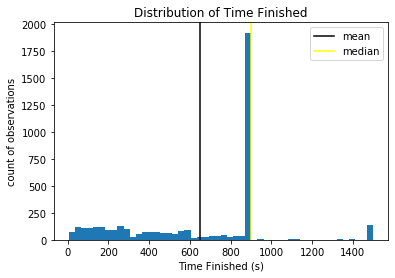

In [37]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check

plt.figure()
plt.hist(df['total_fight_time_secs'], bins = 50)
plt.axvline(df['total_fight_time_secs'].mean(), color = 'black', label = 'mean')
plt.axvline(df['total_fight_time_secs'].median(), color = 'yellow', label = 'median')
plt.xlabel('Time Finished (s)')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Time Finished')

Here we see that most fights have a length of 900 seconds, which makes complete sense. All non-title bouts are 15 minutes and the majority of them go to the decision (not KO/TKO or submissions, etc) which is 900 seconds. Therefore, it would be best to just replace the NaNs with the median if the fight was ended by decision, and replace with average otherwise.

In [38]:
# conditionally set NaNs to median
df['total_fight_time_secs'] = df.apply(
    lambda row: df['total_fight_time_secs'].median() if (np.isnan(row['total_fight_time_secs'])) & (row['finish_DQ'] == 0) & (row['finish_KO/TKO'] == 0) & (row['finish_SUB'] == 0) & (row['finish_Overturned'] == 0) else row['total_fight_time_secs'],
    axis = 1
)
#set remaining NaNs to mean
df['total_fight_time_secs'].fillna(df['total_fight_time_secs'].mean(), inplace = True)

#check
df['total_fight_time_secs']

0       900.000000
1       665.128519
2       665.128519
3       665.128519
4       900.000000
           ...    
4340     44.000000
4341    121.000000
4342     47.000000
4343    900.000000
4344    900.000000
Name: total_fight_time_secs, Length: 4345, dtype: float64

In [39]:
#check
# full info
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4345 non-null   object 
 1   B_fighter                     4345 non-null   object 
 2   R_odds                        4345 non-null   int64  
 3   B_odds                        4345 non-null   int64  
 4   R_ev                          4345 non-null   float64
 5   B_ev                          4345 non-null   float64
 6   date                          4345 non-null   object 
 7   location                      4345 non-null   object 
 8   country                       4345 non-null   object 
 9   Winner                        4345 non-null   object 
 10  title_bout                    4345 non-null   bool   
 11  weight_class                  4345 non-null   object 
 12  gender                        4345 non-null   object 
 13  no_

In [40]:
# transform the `Winner column to 1s and 0s
df['Winner'] = df['Winner'].map({'Blue': 1, 'Red': 0})

# changing the column name
df.rename(columns={"Winner": "winner_is_blue"}, inplace =True)

df['winner_is_blue']

0       1
1       1
2       1
3       0
4       0
       ..
4340    1
4341    0
4342    0
4343    0
4344    1
Name: winner_is_blue, Length: 4345, dtype: int64

In [41]:
# transform the gender column to 1s and 0s
df['gender'] = df['gender'].map({'MALE': 1, 'FEMALE': 0})

# changing the column name
df.rename(columns={"gender": "is_male"}, inplace =True)

df['is_male']

0       1
1       1
2       0
3       1
4       0
       ..
4340    1
4341    1
4342    1
4343    1
4344    1
Name: is_male, Length: 4345, dtype: int64

In [42]:
# transform the title_bout column to 1s and 0s
df['title_bout']  = df['title_bout'].map({True: 1, False: 0})

# changing the column name
df.rename(columns={"title_bout": "is_title_bout"}, inplace =True)

df['is_title_bout']

0       0
1       0
2       0
3       0
4       0
       ..
4340    0
4341    0
4342    0
4343    0
4344    0
Name: is_title_bout, Length: 4345, dtype: int64

In [43]:
X = df.drop(['R_fighter', 'B_fighter', 'date', 'location', 'country', 'winner_is_blue', 'is_male', 'weight_class',
            'B_Stance', 'R_Stance', 'better_rank'], axis=1)
y = df['winner_is_blue']

In [44]:
X.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 77 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_odds                        4345 non-null   int64  
 1   B_odds                        4345 non-null   int64  
 2   R_ev                          4345 non-null   float64
 3   B_ev                          4345 non-null   float64
 4   is_title_bout                 4345 non-null   int64  
 5   no_of_rounds                  4345 non-null   int64  
 6   B_current_lose_streak         4345 non-null   int64  
 7   B_current_win_streak          4345 non-null   int64  
 8   B_draw                        4345 non-null   int64  
 9   B_avg_SIG_STR_landed          4345 non-null   float64
 10  B_avg_SIG_STR_pct             4345 non-null   float64
 11  B_avg_SUB_ATT                 4345 non-null   float64
 12  B_avg_TD_landed               4345 non-null   float64
 13  B_a

In [ ]:
df[['country']].squeeze().value_counts()